In [1]:
import numpy as np 
import math
import pandas as pd
import matplotlib.pyplot as plt

import os.path

from google.auth.transport.requests import Request
from google.oauth2.credentials import Credentials
from google_auth_oauthlib.flow import InstalledAppFlow
from googleapiclient.discovery import build
from googleapiclient.errors import HttpError

from google.oauth2 import service_account

SCOPES = ['https://www.googleapis.com/auth/sqlservice.admin']
SERVICE_ACCOUNT_FILE = 'keys.json'

# If modifying these scopes, delete the file token.json.
SCOPES = ['https://www.googleapis.com/auth/spreadsheets']


creds = None
creds = service_account.Credentials.from_service_account_file(
        SERVICE_ACCOUNT_FILE, scopes=SCOPES)


What is the name of the .csv file? 
Converted s_18_trial_1_with_heater_from_s13.csv


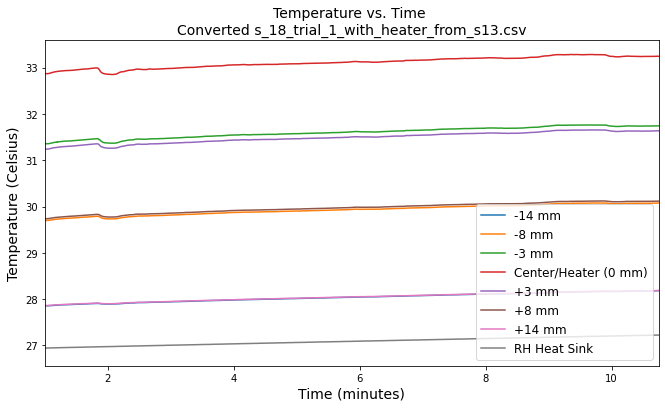

For time  480  we have;
 27.982  29.872  31.546  31.435  29.913  27.987  27.033
For time  720  we have;
 28.045  29.938  31.615  31.505  29.983  28.052  27.092
For time  960  we have;
 28.108  30.013  31.693  31.583  30.055  28.113  27.148
For time  1200  we have;
 28.165  30.062  31.736  31.63  30.105  28.169  27.203
   Time  -14 mm   -8 mm   -3 mm  Center   +3 mm   +8 mm  +14 mm  \
0   4.0  27.982  29.872  31.546  33.060  31.435  29.913  27.987   
1   6.0  28.045  29.938  31.615  33.126  31.505  29.983  28.052   
2   8.0  28.108  30.013  31.693  33.210  31.583  30.055  28.113   
3  10.0  28.165  30.062  31.736  33.244  31.630  30.105  28.169   

   Right Heat Sink  
0           27.033  
1           27.092  
2           27.148  
3           27.203  


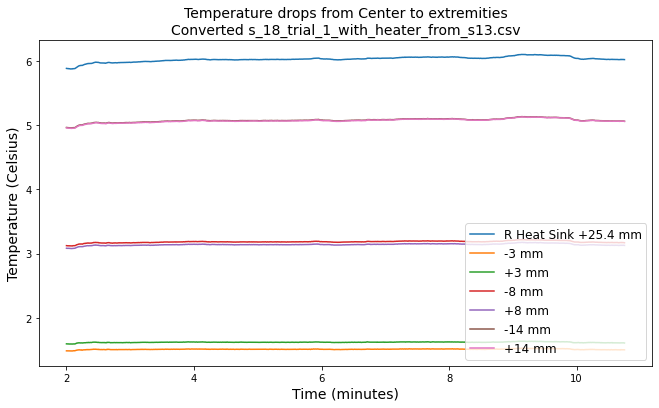

In [8]:

filename=input("What is the name of the .csv file? \n")


with open(filename) as temperature_file:
        ch0 = np.genfromtxt( temperature_file, delimiter =",", skip_header=1, dtype = 'float' , comments = "#", usecols=1)
with open(filename) as temperature_file:
        ch1 = np.genfromtxt( temperature_file, delimiter =",", skip_header=1, dtype = 'float' , comments = "#", usecols=2)
with open(filename) as temperature_file:
        ch2 = np.genfromtxt( temperature_file, delimiter =",", skip_header=1, dtype = 'float' , comments = "#", usecols=3)
with open(filename) as temperature_file:
        ch3 = np.genfromtxt( temperature_file, delimiter =",", skip_header=1, dtype = 'float' , comments = "#", usecols=4)
with open(filename) as temperature_file:
        ch4 = np.genfromtxt( temperature_file, delimiter =",", skip_header=1, dtype = 'float' , comments = "#", usecols=5)
with open(filename) as temperature_file:
        ch5 = np.genfromtxt( temperature_file, delimiter =",", skip_header=1, dtype = 'float' , comments = "#", usecols=6)
with open(filename) as temperature_file:
        ch6 = np.genfromtxt( temperature_file, delimiter =",", skip_header=1, dtype = 'float' , comments = "#", usecols=7)
with open(filename) as temperature_file:
        ch7 = np.genfromtxt( temperature_file, delimiter =",", skip_header=1, dtype = 'float' , comments = "#", usecols=8)       
with open(filename) as temperature_file:
        timestamp = np.genfromtxt( temperature_file, delimiter =",", skip_header=1, dtype = 'float' , comments = "#", usecols=0)        

        
minutes=[i/120 for i in timestamp] 


        
plt.figure(figsize=(11,6))
plt.title("Temperature vs. Time \n"+filename,fontsize=14)
plt.plot(minutes,ch0,label='-14 mm')
plt.plot(minutes,ch1,label='-8 mm')
plt.plot(minutes,ch2,label='-3 mm')
plt.plot(minutes,ch3,label='Center/Heater (0 mm)')
plt.plot(minutes,ch4,label='+3 mm')
plt.plot(minutes,ch5,label='+8 mm')
plt.plot(minutes,ch6,label='+14 mm')
plt.plot(minutes,ch7,label='RH Heat Sink')
plt.legend(fontsize='large',loc='lower right')
plt.xlabel('Time (minutes)',fontsize=14)
plt.ylabel("Temperature (Celsius)",fontsize=14)
plt.xlim(1,max(minutes))
#plt.ylim(22.15)
plt.show()



for i in range(0,len(timestamp)):
    ch0[i]=np.around(ch0[i],decimals=3)
    ch1[i]=np.around(ch1[i],decimals=3)
    ch2[i]=np.around(ch2[i],decimals=3)
    ch3[i]=np.around(ch3[i],decimals=3)
    ch4[i]=np.around(ch4[i],decimals=3)
    ch5[i]=np.around(ch5[i],decimals=3)
    ch6[i]=np.around(ch6[i],decimals=3)
    ch7[i]=np.around(ch7[i],decimals=3)

times=np.array([4,6,8,10])

times=[i*120 for i in times]

#Modified for Sample 5 where -14 is Ch 1 and -8 is Ch0

#print(ch0[times[0]])    
l3=[None]*len(times)
l14=[None]*len(times)
l8=[None]*len(times)
cen=[None]*len(times)
r3=[None]*len(times)
r8=[None]*len(times)
r14=[None]*len(times)
rhs=[None]*len(times)
for i in range(0,len(times)):
    print('For time ',times[i],' we have;')
    print('',ch0[times[i]],'',ch1[times[i]],'',ch2[times[i]],'',ch4[times[i]],'',ch5[times[i]],'',ch6[times[i]],'',ch7[times[i]] )
    l14[i]=ch0[times[i]]
    l8[i]=ch1[times[i]]
    l3[i]=ch2[times[i]]
    cen[i]=ch3[times[i]]
    r3[i]=ch4[times[i]]
    r8[i]=ch5[times[i]]
    r14[i]=ch6[times[i]]
    rhs[i]=ch7[times[i]]
    
times=[i/120 for i in times]
df=pd.DataFrame(data=np.column_stack((times ,l14,l8,l3,cen,r3,r8,r14,rhs)), columns= ['Time', '-14 mm','-8 mm','-3 mm','Center','+3 mm','+8 mm','+14 mm','Right Heat Sink'])
print(df)                
    
df.to_csv(r'Temps times for '+filename+'',index=False,header=True)
  
    
    
# Use these to change the time frame    
# VVVVVVVVVVVVVVVVVVVVVVVVVVVVv
#Normal end value is 1320

ch0=ch0[240:1320]    
ch1=ch1[240:1320]    
ch2=ch2[240:1320]    
ch3=ch3[240:1320]    
ch4=ch4[240:1320]    
ch5=ch5[240:1320]    
ch6=ch6[240:1320]    
ch7=ch7[240:1320]
timestamp=timestamp[240:1320]
    
 
    
# Calculate delta T values    
L3=[None]*len(timestamp)    
L14=[None]*len(timestamp)
L8=[None]*len(timestamp)

R3=[None]*len(timestamp)
R8=[None]*len(timestamp)
R14=[None]*len(timestamp)
RHS=[None]*len(timestamp)
for i in range(0,len(timestamp)):
    L3[i]=ch3[i]-ch2[i]
    L8[i]=ch3[i]-ch1[i]
    L14[i]=ch3[i]-ch0[i]
    
    R3[i]=ch3[i]-ch4[i]
    R8[i]=ch3[i]-ch5[i]
    R14[i]=ch3[i]-ch6[i]
    RHS[i]=ch3[i]-ch7[i]
    
minutes=[i/120 for i in timestamp] 


    
plt.figure(figsize=(11,6))
plt.title("Temperature drops from Center to extremities\n"+filename,fontsize=14)
#plt.plot(minutes,LHS,label='L Heat Sink -25.4 mm')
plt.plot(minutes,RHS,label='R Heat Sink +25.4 mm')
plt.plot(minutes,L3,label='-3 mm')
plt.plot(minutes,R3,label='+3 mm')
plt.plot(minutes,L8,label='-8 mm')
plt.plot(minutes,R8,label='+8 mm')
plt.plot(minutes,L14,label='-14 mm')
plt.plot(minutes,R14,label='+14 mm')
plt.legend(fontsize='large',loc='lower right')
plt.xlabel('Time (minutes)',fontsize=14)
plt.ylabel("Temperature (Celsius)",fontsize=14)
plt.show()  



In [3]:
import matplotlib.pyplot as plt
import math
from statistics import mean
from statistics import stdev
import numpy as np
from scipy.optimize import curve_fit
################
#Temps times for 
##########################
filename=input("What is the name of the .csv file? \n")

with open(filename) as temperature_file:
        xn14 = np.genfromtxt( temperature_file, delimiter =",", skip_header=3, dtype = 'float' , comments = "#", usecols=1)
with open(filename) as temperature_file:
        xn8 = np.genfromtxt( temperature_file, delimiter =",", skip_header=3, dtype = 'float' , comments = "#", usecols=2)
with open(filename) as temperature_file:
        xn3 = np.genfromtxt( temperature_file, delimiter =",", skip_header=3, dtype = 'float' , comments = "#", usecols=3)
with open(filename) as temperature_file:
        xm0 = np.genfromtxt( temperature_file, delimiter =",", skip_header=3, dtype = 'float' , comments = "#", usecols=4)
with open(filename) as temperature_file:
        xp3 = np.genfromtxt( temperature_file, delimiter =",", skip_header=3, dtype = 'float' , comments = "#", usecols=5)
with open(filename) as temperature_file:
        xp8 = np.genfromtxt( temperature_file, delimiter =",", skip_header=3, dtype = 'float' , comments = "#", usecols=6)
with open(filename) as temperature_file:
        xp14 = np.genfromtxt( temperature_file, delimiter =",", skip_header=3, dtype = 'float' , comments = "#", usecols=7)
with open(filename) as temperature_file:
        xhs = np.genfromtxt( temperature_file, delimiter =",", skip_header=3, dtype = 'float' , comments = "#", usecols=8)


What is the name of the .csv file? 
Temps times for Converted s_13_trial_1_done_with_heater_from_s18.csv


xfit=np.array([3,8,14])




#xp3[0],xp8[0],xp14[0]] these are the right side of the carbon foam closes to thermistors in heatsink

#[xn14[0],xn8[0],xn3[0] these are the left side of the carbon foam furtherest to thermistors in heatsink

x_3average = (xp3[0]+xn3[0])/2
print(x_3average,"lets see")
x_8average = (xp8[0]+xn8[0])/2
x_14average = (xp14[0]+xn14[0])/2          
    
Tfit=np.array([x_3average,x_8average,x_14average])

    
    

def line(x,m,b):
    y=m*x+b
    return y

xplot=np.array([14,8,3,0,3,8,14,25.4])

timevalue = 2



We have the slope  -0.321 +/- 0.004  and the intercept  33.096
The difference between center and the bound is:  2.102
[1.45 1.45 1.45 1.45 1.45 1.45 1.45 1.45 1.45 1.45]
[24.  25.1 26.2 27.3 28.4 29.5 30.6 31.7 32.8 33.9]
[28.58  30.526 32.178 34.733 32.083 30.548 28.629 27.613]


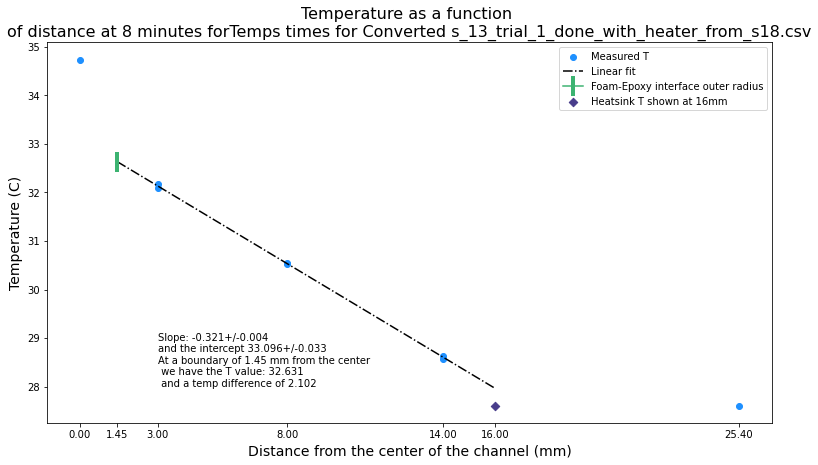

In [7]:




############################

#These are the x positions of the thermistors where the center is the reference
xfit=np.array([14,8,3,3,8,14])

Tfit=np.array([xn14[0],xn8[0],xn3[0],xp3[0],xp8[0],xp14[0]])



def line(x,m,b):
    y=m*x+b
    return y

xplot=np.array([14,8,3,0,3,8,14,25.4])

timevalue = 2

#the values below this are the blue markers on the graph
tplot=np.array([xn14[0],xn8[0],xn3[0],xm0[0],xp3[0],xp8[0],xp14[0],xhs[0]])




popt,pcov=curve_fit(line,xfit,Tfit,p0=[-0.39,33])

ls=str(np.around(popt[0],decimals=3))
li=str(np.around(popt[1],decimals=3))
els=np.sqrt(np.diag(pcov))

print("We have the slope ",np.around(popt[0],decimals=3),'+/-',np.around(els[0],decimals=3),' and the intercept ',np.around(popt[1],decimals=3)),'+/-',np.around(els[1],decimals=3)


lval=els[1]
#errors
els=str(np.around(els[0],decimals=3))
eli=str(np.around(lval,decimals=3))

rint=line(1.45,popt[0],popt[1])
#print("At x=1.45 we have a T of ",np.around(rint,decimals=3))
#print(rint)

bound=str(np.around(rint,decimals=3))

diff=tplot[3]-rint
diffstr=str(np.around(diff,decimals=3))
a="Slope: "+ls+'+/-'+els+' \nand the intercept '+li+'+/-'+eli+"\nAt a boundary of 1.45 mm from the center\n we have the T value: "+bound+'\n and a temp difference of '+diffstr



print("The difference between center and the bound is: ",np.around(diff,decimals=3) )

drx=np.arange(1.45,16,step=0.1)


dry=[None]*len(drx)
for i in range(0,len(drx)):
    dry[i]=line(drx[i],popt[0],popt[1])
    
    

fitx=np.array(np.full(10,1.45))
fity=np.array(np.arange(24,35,1.1))
print(fitx)
print(fity)


print(tplot)

Data_x = 1.45
Data_Tvalue = np.around(rint,decimals=3) # don't delete this this now automatically moves the green bar

hs_temp = tplot[-1] #this is the temperature of the heatsink

hs_distance = np.array(16) #This is the distnace to the heatsink in mm
#print("hi", hs)

plt.figure(figsize=(13,7))
plt.title("Temperature as a function \nof distance at 8 minutes for"+filename,fontsize=16)
plt.xlabel('Distance from the center of the channel (mm)',fontsize=14)
plt.ylabel('Temperature (C)',fontsize=14)
plt.scatter(xplot,tplot,color='dodgerblue',marker='o',label="Measured T")
plt.plot(drx,dry,color='black',ls='-.',label='Linear fit')
#plt.plot(fitx,fity,color='mediumseagreen',label='Epoxy interface')
plt.plot(Data_x,Data_Tvalue,markersize=20,color='mediumseagreen',label='Foam-Epoxy interface outer radius', marker='|', mew=4)
plt.scatter(hs_distance,hs_temp,color='darkslateblue',marker='D',label='Heatsink T shown at 16mm')
plt.text(3,28,a)
plt.xticks((0,1.45,3,8,14,hs_distance,25.4))
plt.legend(loc="upper right")
plt.show()

In [26]:
import matplotlib.pyplot as plt
import math
from statistics import mean
from statistics import stdev
import numpy as np
from scipy.optimize import curve_fit
################
#Temps times for 
##########################
filename=input("What is the name of the .csv file? \n")

with open(filename) as temperature_file:
        xn14_1 = np.genfromtxt( temperature_file, delimiter =",", skip_header=3, dtype = 'float' , comments = "#", usecols=1)
with open(filename) as temperature_file:
        xn8_1 = np.genfromtxt( temperature_file, delimiter =",", skip_header=3, dtype = 'float' , comments = "#", usecols=2)
with open(filename) as temperature_file:
        xn3_1 = np.genfromtxt( temperature_file, delimiter =",", skip_header=3, dtype = 'float' , comments = "#", usecols=3)
with open(filename) as temperature_file:
        xm0_1 = np.genfromtxt( temperature_file, delimiter =",", skip_header=3, dtype = 'float' , comments = "#", usecols=4)
with open(filename) as temperature_file:
        xp3_1 = np.genfromtxt( temperature_file, delimiter =",", skip_header=3, dtype = 'float' , comments = "#", usecols=5)
with open(filename) as temperature_file:
        xp8_1 = np.genfromtxt( temperature_file, delimiter =",", skip_header=3, dtype = 'float' , comments = "#", usecols=6)
with open(filename) as temperature_file:
        xp14_1 = np.genfromtxt( temperature_file, delimiter =",", skip_header=3, dtype = 'float' , comments = "#", usecols=7)
with open(filename) as temperature_file:
        xhs_1 = np.genfromtxt( temperature_file, delimiter =",", skip_header=3, dtype = 'float' , comments = "#", usecols=8)


What is the name of the .csv file? 
Temps times for Converted s_18_trial_1_with_heater_from_s13.csv


We have the slope  -0.321 +/- 0.004  and the intercept 32.6
The difference between center and the bound is:  1.075
[1.45 1.45 1.45 1.45 1.45 1.45 1.45 1.45 1.45 1.45]
[24.  25.1 26.2 27.3 28.4 29.5 30.6 31.7 32.8 33.9]
[28.108 30.013 31.693 33.21  31.583 30.055 28.113 27.148]


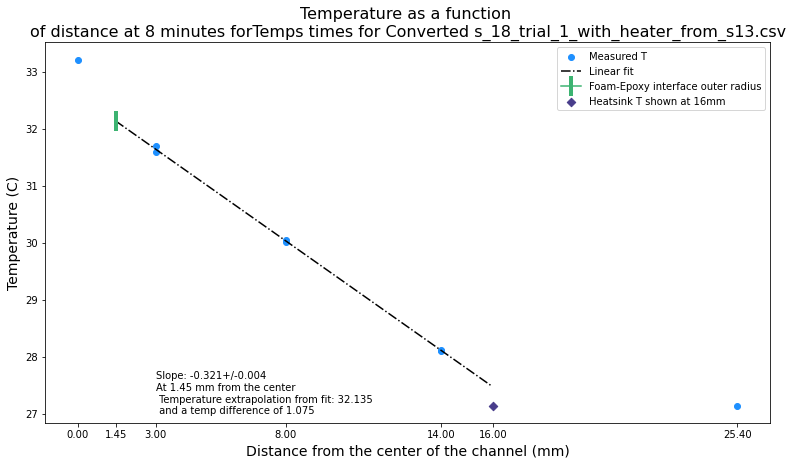

In [27]:




############################

#These are the x positions of the thermistors where the center is the reference
xfit_1=np.array([14,8,3,3,8,14])

Tfit_1=np.array([xn14_1[0],xn8_1[0],xn3_1[0],xp3_1[0],xp8_1[0],xp14_1[0]])



def line_1(x,m,b):
    y=m*x+b
    return y

xplot_1=np.array([14,8,3,0,3,8,14,25.4])

timevalue_1 = 2

#the values below this are the blue markers on the graph
tplot_1=np.array([xn14_1[0],xn8_1[0],xn3_1[0],xm0_1[0],xp3_1[0],xp8_1[0],xp14_1[0],xhs_1[0]])




popt_1,pcov_1=curve_fit(line_1,xfit_1,Tfit_1,p0=[-0.39,33])

ls_1=str(np.around(popt_1[0],decimals=3))
li_1=str(np.around(popt_1[1],decimals=3))
els_1=np.sqrt(np.diag(pcov_1))

print("We have the slope ",np.around(popt_1[0],decimals=3),'+/-',np.around(els_1[0],decimals=3),' and the intercept',np.around(popt_1[1],decimals=3)),'+/-',np.around(els_1[1],decimals=3)


lval_1=els_1[1]
#errors
els_1=str(np.around(els_1[0],decimals=3))
eli_1=str(np.around(lval_1,decimals=3))

rint_1=line_1(1.45,popt_1[0],popt_1[1])
#print("At x=1.45 we have a T of ",np.around(rint,decimals=3))
#print(rint)

bound_1=str(np.around(rint_1,decimals=3))

diff_1=tplot_1[3]-rint_1
diffstr_1=str(np.around(diff_1,decimals=3))
#a_1="Slope: "+ls_1+'+/-'+els_1+' \nand the intercept '+li_1+'+/-'+eli_1+"\nAt a boundary of 1.45 mm from the center\n we have the T value: "+bound_1+'\n and a temp difference of '+diffstr_1
a_1="Slope: "+ls_1+'+/-'+els_1+"\nAt 1.45 mm from the center\n Temperature extrapolation from fit: "+bound_1+'\n and a temp difference of '+diffstr_1



print("The difference between center and the bound is: ",np.around(diff_1,decimals=3) )

drx_1=np.arange(1.45,16,step=0.1)


dry_1=[None]*len(drx_1)
for i in range(0,len(drx_1)):
    dry_1[i]=line(drx_1[i],popt_1[0],popt_1[1])
    
    

fitx_1=np.array(np.full(10,1.45))
fity_1=np.array(np.arange(24,35,1.1))
print(fitx_1)
print(fity_1)


print(tplot_1)

Data_x_1 = 1.45
Data_Tvalue_1 = np.around(rint_1,decimals=3) # don't delete this this now automatically moves the green bar

hs_temp_1 = tplot_1[-1] #this is the temperature of the heatsink

hs_distance_1 = np.array(16) #This is the distnace to the heatsink in mm
#print("hi", hs)

plt.figure(figsize=(13,7))
plt.title("Temperature as a function \nof distance at 8 minutes for"+filename,fontsize=16)
plt.xlabel('Distance from the center of the channel (mm)',fontsize=14)
plt.ylabel('Temperature (C)',fontsize=14)
plt.scatter(xplot_1,tplot_1,color='dodgerblue',marker='o',label="Measured T")
plt.plot(drx_1,dry_1,color='black',ls='-.',label='Linear fit')
#plt.plot(fitx,fity,color='mediumseagreen',label='Epoxy interface')
plt.plot(Data_x_1,Data_Tvalue_1,markersize=20,color='mediumseagreen',label='Foam-Epoxy interface outer radius', marker='|', mew=4)
plt.scatter(hs_distance_1,hs_temp_1,color='darkslateblue',marker='D',label='Heatsink T shown at 16mm')
plt.text(3,27,a_1)
plt.xticks((0,1.45,3,8,14,hs_distance_1,25.4))
plt.legend(loc="upper right")
plt.show()

In [49]:
import matplotlib.pyplot as plt
import math
from statistics import mean
from statistics import stdev
import numpy as np
from scipy.optimize import curve_fit
################
#Temps times for 
##########################
filename=input("What is the name of the .csv file? \n")

with open(filename) as temperature_file:
        xn14_2 = np.genfromtxt( temperature_file, delimiter =",", skip_header=3, dtype = 'float' , comments = "#", usecols=1)
with open(filename) as temperature_file:
        xn8_2 = np.genfromtxt( temperature_file, delimiter =",", skip_header=3, dtype = 'float' , comments = "#", usecols=2)
with open(filename) as temperature_file:
        xn3_2 = np.genfromtxt( temperature_file, delimiter =",", skip_header=3, dtype = 'float' , comments = "#", usecols=3)
with open(filename) as temperature_file:
        xm0_2 = np.genfromtxt( temperature_file, delimiter =",", skip_header=3, dtype = 'float' , comments = "#", usecols=4)
with open(filename) as temperature_file:
        xp3_2 = np.genfromtxt( temperature_file, delimiter =",", skip_header=3, dtype = 'float' , comments = "#", usecols=5)
with open(filename) as temperature_file:
        xp8_2 = np.genfromtxt( temperature_file, delimiter =",", skip_header=3, dtype = 'float' , comments = "#", usecols=6)
with open(filename) as temperature_file:
        xp14_2 = np.genfromtxt( temperature_file, delimiter =",", skip_header=3, dtype = 'float' , comments = "#", usecols=7)
with open(filename) as temperature_file:
        xhs_2 = np.genfromtxt( temperature_file, delimiter =",", skip_header=3, dtype = 'float' , comments = "#", usecols=8)


What is the name of the .csv file? 
Temps times for Converted s_13_trial_1_heater_white_insulation.csv


We have the slope  -0.328 +/- 0.006  and the intercept 30.613
The difference between center and the bound is:  1.2
[1.45 1.45 1.45 1.45 1.45 1.45 1.45 1.45 1.45 1.45]
[24.  25.1 26.2 27.3 28.4 29.5 30.6 31.7 32.8 33.9]
[26.573 28.308 29.834 31.312 29.65  28.279 26.529 25.656]


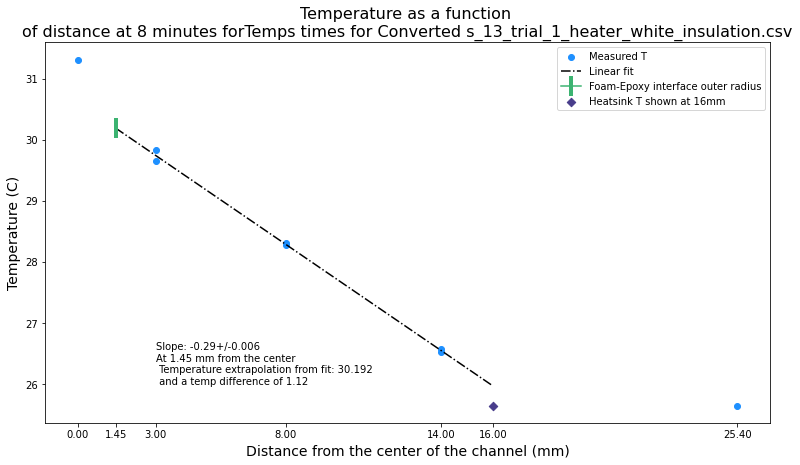

In [50]:




############################

#These are the x positions of the thermistors where the center is the reference
xfit_2=np.array([14,8,3,3,8,14])

Tfit_2=np.array([xn14_2[0],xn8_2[0],xn3_2[0],xp3_2[0],xp8_2[0],xp14_2[0]])



def line_2(x,m,b):
    y=m*x+b
    return y

xplot_2=np.array([14,8,3,0,3,8,14,25.4])

timevalue_2 = 2

#the values below this are the blue markers on the graph
tplot_2=np.array([xn14_2[0],xn8_2[0],xn3_2[0],xm0_2[0],xp3_2[0],xp8_2[0],xp14_2[0],xhs_2[0]])




popt_2,pcov_2=curve_fit(line_2,xfit_2,Tfit_2,p0=[-0.39,33])

ls_2=str(np.around(popt_2[0],decimals=3))
li_2=str(np.around(popt_2[1],decimals=3))
els_2=np.sqrt(np.diag(pcov_2))

print("We have the slope ",np.around(popt_1[0],decimals=3),'+/-',np.around(els_2[0],decimals=3),' and the intercept',np.around(popt_2[1],decimals=3)),'+/-',np.around(els_2[1],decimals=3)


lval_2=els_2[1]
#errors
els_2=str(np.around(els_2[0],decimals=3))
eli_2=str(np.around(lval_2,decimals=3))

rint_2=line_1(1.45,popt_2[0],popt_2[1])
#print("At x=1.45 we have a T of ",np.around(rint,decimals=3))
#print(rint)

bound_2=str(np.around(rint_2,decimals=3))

diff_2=tplot_2[3]-rint_2
diffstr_2=str(np.around(diff_2,decimals=3))
#a_1="Slope: "+ls_1+'+/-'+els_1+' \nand the intercept '+li_1+'+/-'+eli_1+"\nAt a boundary of 1.45 mm from the center\n we have the T value: "+bound_1+'\n and a temp difference of '+diffstr_1
a_2="Slope: "+ls_2+'+/-'+els_2+"\nAt 1.45 mm from the center\n Temperature extrapolation from fit: "+bound_2+'\n and a temp difference of '+diffstr_2



print("The difference between center and the bound is: ",np.around(diff_1,decimals=3) )

drx_2=np.arange(1.45,16,step=0.1)


dry_2=[None]*len(drx_2)
for i in range(0,len(drx_2)):
    dry_2[i]=line(drx_2[i],popt_2[0],popt_2[1])
    
    

fitx_2=np.array(np.full(10,1.45))
fity_2=np.array(np.arange(24,35,1.1))
print(fitx_2)
print(fity_2)


print(tplot_2)

Data_x_2 = 1.45
Data_Tvalue_2 = np.around(rint_2,decimals=3) # don't delete this this now automatically moves the green bar

hs_temp_2 = tplot_2[-1] #this is the temperature of the heatsink

hs_distance_2 = np.array(16) #This is the distnace to the heatsink in mm
#print("hi", hs)

plt.figure(figsize=(13,7))
plt.title("Temperature as a function \nof distance at 8 minutes for"+filename,fontsize=16)
plt.xlabel('Distance from the center of the channel (mm)',fontsize=14)
plt.ylabel('Temperature (C)',fontsize=14)
plt.scatter(xplot_2,tplot_2,color='dodgerblue',marker='o',label="Measured T")
plt.plot(drx_2,dry_2,color='black',ls='-.',label='Linear fit')
#plt.plot(fitx,fity,color='mediumseagreen',label='Epoxy interface')
plt.plot(Data_x_2,Data_Tvalue_2,markersize=20,color='mediumseagreen',label='Foam-Epoxy interface outer radius', marker='|', mew=4)
plt.scatter(hs_distance_2,hs_temp_2,color='darkslateblue',marker='D',label='Heatsink T shown at 16mm')
plt.text(3,26,a_2)
plt.xticks((0,1.45,3,8,14,hs_distance_2,25.4))
plt.legend(loc="upper right")
plt.show()

'\n#this is underscore 2\nplt.title("Temp vs distance ",fontsize=16)\nplt.xlabel(\'Distance from the center of the channel (mm)\',fontsize=14)\nplt.ylabel(\'Temperature (C)\',fontsize=14)\nplt.scatter(xplot_2,tplot_2,color=\'red\',marker=\'o\',label="sample 13")\nplt.plot(drx_2,dry_2,color=\'black\',ls=\'-.\',label=\'Linear fit\')\n#plt.plot(fitx,fity,color=\'mediumseagreen\',label=\'Epoxy interface\')\nplt.plot(Data_x_2,Data_Tvalue_2,markersize=20,color=\'mediumseagreen\',label=\'Foam-Epoxy interface outer radius\', marker=\'|\', mew=4)\nplt.scatter(hs_distance_2,hs_temp_2,color=\'darkslateblue\',marker=\'D\',label=\'Heatsink T shown at 16mm\')\nplt.text(3,32,a_2)\nplt.xticks((0,1.45,3,8,14,hs_distance_2,25.4))\nplt.legend(loc="upper right")\nplt.show()\n'

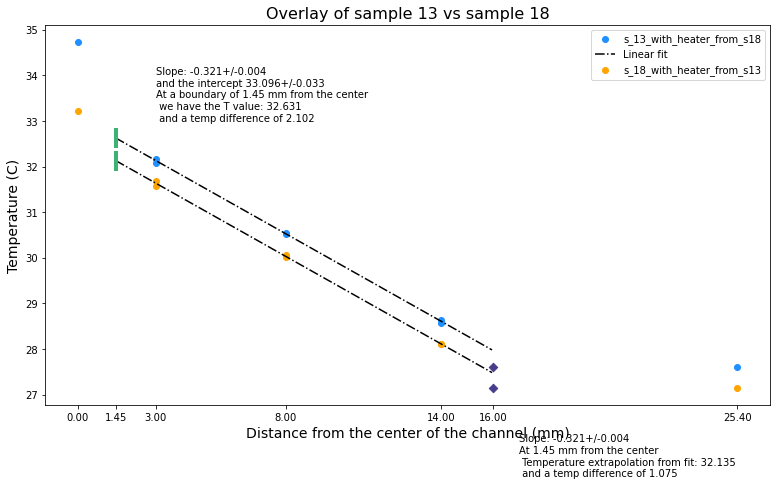

In [28]:
#this is no underscore

plt.figure(figsize=(13,7))
plt.title("Temperature as a function \nof distance at 8 minutes for"+filename,fontsize=16)
plt.xlabel('Distance from the center of the channel (mm)',fontsize=14)
plt.ylabel('Temperature (C)',fontsize=14)
plt.scatter(xplot,tplot,color='dodgerblue',marker='o',label="s_13_with_heater_from_s18")
plt.plot(drx,dry,color='black',ls='-.',label='Linear fit')
#plt.plot(fitx,fity,color='mediumseagreen',label='Epoxy interface')
plt.plot(Data_x,Data_Tvalue,markersize=20,color='mediumseagreen', marker='|', mew=4)
plt.scatter(hs_distance,hs_temp,color='darkslateblue',marker='D',)
plt.text(3,33,a)
plt.xticks((0,1.45,3,8,14,hs_distance,25.4))
plt.legend(loc="upper right")



#this is underscore 1

plt.title("Overlay of sample 13 vs sample 18",fontsize=16)
plt.xlabel('Distance from the center of the channel (mm)',fontsize=14)
plt.ylabel('Temperature (C)',fontsize=14)
plt.scatter(xplot_1,tplot_1,color='orange',marker='o',label="s_18_with_heater_from_s13")
plt.plot(drx_1,dry_1,color='black',ls='-.',)
#plt.plot(fitx,fity,color='mediumseagreen',label='Epoxy interface')
plt.plot(Data_x_1,Data_Tvalue_1,markersize=20,color='mediumseagreen', marker='|', mew=4)
plt.scatter(hs_distance_1,hs_temp_1,color='darkslateblue',marker='D',)
plt.text(17,25.2,a_1)
plt.xticks((0,1.45,3,8,14,hs_distance_1,25.4))
plt.legend(loc="upper right")

"""
#this is underscore 2
plt.title("Temp vs distance ",fontsize=16)
plt.xlabel('Distance from the center of the channel (mm)',fontsize=14)
plt.ylabel('Temperature (C)',fontsize=14)
plt.scatter(xplot_2,tplot_2,color='red',marker='o',label="sample 13")
plt.plot(drx_2,dry_2,color='black',ls='-.',label='Linear fit')
#plt.plot(fitx,fity,color='mediumseagreen',label='Epoxy interface')
plt.plot(Data_x_2,Data_Tvalue_2,markersize=20,color='mediumseagreen',label='Foam-Epoxy interface outer radius', marker='|', mew=4)
plt.scatter(hs_distance_2,hs_temp_2,color='darkslateblue',marker='D',label='Heatsink T shown at 16mm')
plt.text(3,32,a_2)
plt.xticks((0,1.45,3,8,14,hs_distance_2,25.4))
plt.legend(loc="upper right")
plt.show()
"""

In [27]:
print(bound)

28.957


In [71]:
#this will be for putting data into spreadsheet



# The ID and range of a sample spreadsheet.
SAMPLE_SPREADSHEET_ID = '11cnXUin-W1K-mfUUxTvRYMegG5tejAxoYAivRjeQAh0'


service = build('sheets', 'v4', credentials=creds)

# Call the Sheets API
sheet = service.spreadsheets()

#Change cell number to cell in which you want to write to otherwise you will overwrite old data.
result = sheet.values().get(spreadsheetId=SAMPLE_SPREADSHEET_ID,
                            range="Sheet1!B118").execute()

values = result.get('values', [])

hs_temp = tplot[-1] #this is the temperature of the heatsink
temp_heater =tplot[3]  #this is the temperature of the heater
index_number = 118
the_slope = ls #slope
the_uncertainty_of_slope = els #uncertainity of the slope
the_slope_intercept = li #slope intercept
t_value = bound #t value
delta_t = diffstr #delta t
this_filename = filename
resistor_value = 4.2

mascotas = [[index_number,this_filename,resistor_value,"battery",4,the_slope,the_uncertainty_of_slope,7,t_value,delta_t,10,hs_temp,12,13,14,15]]


#Change cell number to cell in which you want to write to otherwise you will overwrite old data.
request = sheet.values().update(spreadsheetId=SAMPLE_SPREADSHEET_ID, 
                                range="Sheet1!B118", valueInputOption="USER_ENTERED", body={"values":mascotas}).execute()






In [78]:
## import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd
from statistics import mean
from statistics import stdev
import numpy as np
from tabulate import tabulate
from scipy.optimize import curve_fit


xfit=np.array([-14,-8,-3,0,3,8,14])

Tfit4=np.array([])
Tfit6=np.array([])
Tfit8=np.array([])
Tfit10=np.array([])



def line(x,m,b):
    y=m*x+b
    return y



popt4,pcov4=curve_fit(line,xfit,Tfit4,p0=[-0.39,33])
popt6,pcov6=curve_fit(line,xfit,Tfit6,p0=[-0.39,33])
popt8,pcov8=curve_fit(line,xfit,Tfit8,p0=[-0.39,33])
popt10,pcov10=curve_fit(line,xfit,Tfit10,p0=[-0.39,33])

#4 minutes    
ls4=str(np.around(popt4[0],decimals=3))
li4=str(np.around(popt4[1],decimals=3))
els4=np.sqrt(np.diag(pcov4))

print("4 minutes: We have the slope ",np.around(popt4[0],decimals=3),'+/-',np.around(els4[0],decimals=3),' and the intercept ',np.around(popt4[1],decimals=3)),'+/-',np.around(els4[1],decimals=3)


#lval=els[1]
#errors
els4=str(np.around(els4[0],decimals=3))
eli4=str(np.around(els4[1],decimals=3))

rint4=line(1.45,popt4[0],popt4[1])
print("For 4 min, at x=1.45 we have a T of ",np.around(rint4,decimals=3))

bound4=str(np.around(rint4,decimals=3))

a="Slope: "+ls4+'+/-'+els4+' \nand the intercept '+li4+'+/-'+eli4+"\nAt a boundary of 1.45 mm from the center\n we have the T value: "+bound4


diff4=Tfit4[3]-rint4

print("The difference between center and the bound is: ",np.around(diff4,decimals=3) )

#6 minutes
ls6=str(np.around(popt6[0],decimals=3))
li6=str(np.around(popt6[1],decimals=3))
els6=np.sqrt(np.diag(pcov6))

print("6 minutes: We have the slope ",np.around(popt6[0],decimals=3),'+/-',np.around(els6[0],decimals=3),' and the intercept ',np.around(popt6[1],decimals=3)),'+/-',np.around(els6[1],decimals=3)


#lval=els[1]
#errors
els6=str(np.around(els6[0],decimals=3))
eli6=str(np.around(els6[1],decimals=3))

rint6=line(1.45,popt6[0],popt6[1])
print("For 6 min, at x=1.45 we have a T of ",np.around(rint6,decimals=3))

bound6=str(np.around(rint6,decimals=3))

b="Slope: "+ls6+'+/-'+els6+' \nand the intercept '+li6+'+/-'+eli6+"\nAt a boundary of 1.45 mm from the center\n we have the T value: "+bound6


diff6=Tfit6[3]-rint6

print("The difference between center and the bound is: ",np.around(diff6,decimals=3) )

#8 minutes

ls8=str(np.around(popt8[0],decimals=3))
li8=str(np.around(popt8[1],decimals=3))
els8=np.sqrt(np.diag(pcov8))

print("8 minutes: We have the slope ",np.around(popt8[0],decimals=3),'+/-',np.around(els8[0],decimals=3),' and the intercept ',np.around(popt8[1],decimals=3)),'+/-',np.around(els8[1],decimals=3)


#lval=els[1]
#errors
els8=str(np.around(els8[0],decimals=3))
eli8=str(np.around(els8[1],decimals=3))

rint8=line(1.45,popt8[0],popt8[1])
print("For 8 min, at x=1.45 we have a T of ",np.around(rint8,decimals=3))

bound8=str(np.around(rint8,decimals=3))

c="Slope: "+ls8+'+/-'+els8+' \nand the intercept '+li8+'+/-'+eli8+"\nAt a boundary of 1.45 mm from the center\n we have the T value: "+bound8


diff8=Tfit8[3]-rint8

print("The difference between center and the bound is: ",np.around(diff8,decimals=3) )


#10 minutes

ls10=str(np.around(popt10[0],decimals=3))
li10=str(np.around(popt10[1],decimals=3))
els10=np.sqrt(np.diag(pcov8))

print("10 minutes: We have the slope ",np.around(popt10[0],decimals=3),'+/-',np.around(els10[0],decimals=3),' and the intercept ',np.around(popt10[1],decimals=3)),'+/-',np.around(els10[1],decimals=3)


#lval=els[1]
#errors
els10=str(np.around(els10[0],decimals=3))
eli10=str(np.around(els10[1],decimals=3))

rint10=line(1.45,popt10[0],popt10[1])
print("For 10 min, at x=1.45 we have a T of ",np.around(rint10,decimals=3))

bound10=str(np.around(rint10,decimals=3))

d="Slope: "+ls10+'+/-'+els10+' \nand the intercept '+li10+'+/-'+eli10+"\nAt a boundary of 1.45 mm from the center\n we have the T value: "+bound10


diff10=Tfit10[3]-rint10

print("The difference between center and the bound is: ",np.around(diff8,decimals=3) )

##############
#Plots#

drx=np.arange(0,25.6,step=0.1)

dry4=[None]*len(drx)
dry6=[None]*len(drx)
dry8=[None]*len(drx)
dry10=[None]*len(drx)
for i in range(0,len(drx)):
    dry4[i]=line(drx[i],popt4[0],popt4[1])
    dry6[i]=line(drx[i],popt6[0],popt6[1])
    dry8[i]=line(drx[i],popt8[0],popt8[1])
    dry10[i]=line(drx[i],popt10[0],popt10[1])



plt.figure(figsize=(11,5))


ValueError: `ydata` must not be empty!